In [1]:
# Import the libraries
import tensorflow as tf
from tensorflow.python.client import device_lib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [2]:
# Check that a GPU is available
tf.test.is_gpu_available(
    cuda_only=False,
    min_cuda_compute_capability=None
)

True

In [3]:
# Check the number of GPUs available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [4]:
# Get device details
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 4619965414584359703, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 4937233203
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10946558795709127065
 physical_device_desc: "device: 0, name: GeForce GTX 1060, pci bus id: 0000:01:00.0, compute capability: 6.1"]

### Simple logistic regression model

In [5]:
# Import the data
data = pd.read_csv('banknote_data.csv')
data.head(n=5)

,x1,x2,x3,x4,y
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [6]:
# Prepare the data
X = data.iloc[:,0:4]
y = data[['y']]

# Create the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [7]:
# Define the model layers
D = X.shape[1] # Size of input vector
input_layer = tf.keras.layers.Input(shape=(D,))
dense_layer = tf.keras.layers.Dense(1, activation='sigmoid')

In [8]:
# Create the model
model = tf.keras.Sequential([input_layer, dense_layer])

In [9]:
# Define how the model will be trained/fit
model.compile(optimizer='adam', # define the optimizer (adam is one way of doing gradient descent)
              loss='binary_crossentropy', # define the cost function
              metrics=['accuracy']) # define the metrics that tensorflow should keep track of

In [10]:
# Train/fit the model
result = model.fit(X_train, y_train,
                   validation_data=(X_test, y_test),
                   epochs=150);

Train on 1029 samples, validate on 343 samples
Epoch 1/150
1029/1029 [==============================] - 0s 336us/sample - loss: 0.7716 - accuracy: 0.4742 - val_loss: 0.7087 - val_accuracy: 0.5598
Epoch 2/150
1029/1029 [==============================] - 0s 58us/sample - loss: 0.6833 - accuracy: 0.5909 - val_loss: 0.6362 - val_accuracy: 0.6676
Epoch 3/150
1029/1029 [==============================] - 0s 100us/sample - loss: 0.6211 - accuracy: 0.6754 - val_loss: 0.5847 - val_accuracy: 0.7114
Epoch 4/150
1029/1029 [==============================] - 0s 72us/sample - loss: 0.5741 - accuracy: 0.7240 - val_loss: 0.5431 - val_accuracy: 0.7434
Epoch 5/150
1029/1029 [==============================] - 0s 72us/sample - loss: 0.5351 - accuracy: 0.7648 - val_loss: 0.5086 - val_accuracy: 0.7872
Epoch 6/150
1029/1029 [==============================] - 0s 72us/sample - loss: 0.5019 - accuracy: 0.7969 - val_loss: 0.4787 - val_accuracy: 0.8222
Epoch 7/150
1029/1029 [==============================] - 0s 204

1029/1029 [==============================] - 0s 99us/sample - loss: 0.1171 - accuracy: 0.9815 - val_loss: 0.1192 - val_accuracy: 0.9679
Epoch 55/150
1029/1029 [==============================] - 0s 92us/sample - loss: 0.1150 - accuracy: 0.9815 - val_loss: 0.1174 - val_accuracy: 0.9679
Epoch 56/150
1029/1029 [==============================] - 0s 67us/sample - loss: 0.1132 - accuracy: 0.9825 - val_loss: 0.1157 - val_accuracy: 0.9679
Epoch 57/150
1029/1029 [==============================] - 0s 68us/sample - loss: 0.1115 - accuracy: 0.9825 - val_loss: 0.1140 - val_accuracy: 0.9679
Epoch 58/150
1029/1029 [==============================] - 0s 67us/sample - loss: 0.1096 - accuracy: 0.9825 - val_loss: 0.1123 - val_accuracy: 0.9679
Epoch 59/150
1029/1029 [==============================] - 0s 68us/sample - loss: 0.1079 - accuracy: 0.9825 - val_loss: 0.1107 - val_accuracy: 0.9679
Epoch 60/150
1029/1029 [==============================] - 0s 66us/sample - loss: 0.1062 - accuracy: 0.9835 - val_loss: 

1029/1029 [==============================] - 0s 65us/sample - loss: 0.0606 - accuracy: 0.9903 - val_loss: 0.0669 - val_accuracy: 0.9738
Epoch 110/150
1029/1029 [==============================] - 0s 69us/sample - loss: 0.0601 - accuracy: 0.9903 - val_loss: 0.0665 - val_accuracy: 0.9738
Epoch 111/150
1029/1029 [==============================] - 0s 60us/sample - loss: 0.0596 - accuracy: 0.9903 - val_loss: 0.0660 - val_accuracy: 0.9738
Epoch 112/150
1029/1029 [==============================] - 0s 70us/sample - loss: 0.0591 - accuracy: 0.9903 - val_loss: 0.0655 - val_accuracy: 0.9738
Epoch 113/150
1029/1029 [==============================] - 0s 59us/sample - loss: 0.0586 - accuracy: 0.9903 - val_loss: 0.0651 - val_accuracy: 0.9738
Epoch 114/150
1029/1029 [==============================] - 0s 72us/sample - loss: 0.0581 - accuracy: 0.9903 - val_loss: 0.0647 - val_accuracy: 0.9738
Epoch 115/150
1029/1029 [==============================] - 0s 67us/sample - loss: 0.0576 - accuracy: 0.9903 - val_

In [11]:
# Print the results
print("Train score:", model.evaluate(x=X_train, y=y_train, verbose=0)[1])
print("Test score:", model.evaluate(x=X_test, y=y_test, verbose=0)[1])

Train score: 0.9873664
Test score: 0.9766764


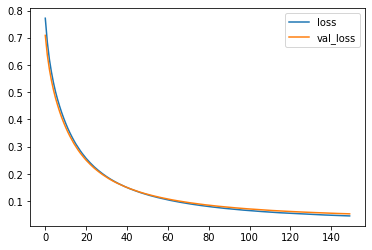

In [12]:
# Plot the cost function at each itteration
# Note: model.fit() returns an object that contains the history of the training process
plt.plot(result.history['loss'], label='loss');
plt.plot(result.history['val_loss'], label='val_loss');
plt.legend();

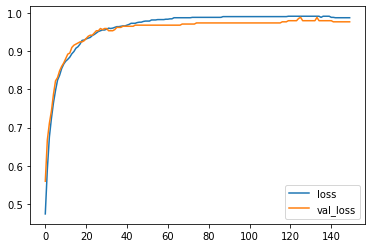

In [13]:
# Plot the cost function at each itteration
# Note: model.fit() returns an object that contains the history of the training process
plt.plot(result.history['accuracy'], label='loss');
plt.plot(result.history['val_accuracy'], label='val_loss');
plt.legend();

### Try another example

In [14]:
# Import the dataset
data = load_breast_cancer()

In [15]:
# Check data type
type(data)

sklearn.utils.Bunch

In [16]:
# Bunch is like a dict, so we can have a look at the keys
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [17]:
# Inspect the data shape
data.data.shape

(569, 30)

In [18]:
# Inpect the target shape
data.target.shape

(569,)

In [19]:
# See what the 1s and 0s mean
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [20]:
# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.data)

In [21]:
# Create the train-test split
X_train, X_test, y_train, y_test = train_test_split(data_scaled, data.target, test_size=0.25, random_state=100)

In [22]:
# Define the model layers
D = data_scaled.shape[1] # Size of input vector
input_layer = tf.keras.layers.Input(shape=(D,))
dense_layer = tf.keras.layers.Dense(1, activation='sigmoid')

In [23]:
# Create the model
model = tf.keras.Sequential([input_layer, dense_layer])

In [24]:
# Define how the model will be trained/fit
model.compile(optimizer='adam', # define the optimizer (adam is one way of doing gradient descent)
              loss='binary_crossentropy', # define the cost function
              metrics=['accuracy']) # define the metrics that tensorflow should keep track of

In [25]:
# Train/fit the model
result = model.fit(X_train, y_train,
                   validation_data=(X_test, y_test),
                   epochs=150);

Train on 426 samples, validate on 143 samples
Epoch 1/150
426/426 [==============================] - 1s 1ms/sample - loss: 0.7639 - accuracy: 0.5446 - val_loss: 0.6466 - val_accuracy: 0.6224
Epoch 2/150
426/426 [==============================] - 0s 120us/sample - loss: 0.6901 - accuracy: 0.6056 - val_loss: 0.5794 - val_accuracy: 0.6993
Epoch 3/150
426/426 [==============================] - 0s 120us/sample - loss: 0.6269 - accuracy: 0.6643 - val_loss: 0.5210 - val_accuracy: 0.7343
Epoch 4/150
426/426 [==============================] - 0s 117us/sample - loss: 0.5701 - accuracy: 0.7066 - val_loss: 0.4731 - val_accuracy: 0.7832
Epoch 5/150
426/426 [==============================] - 0s 103us/sample - loss: 0.5222 - accuracy: 0.7371 - val_loss: 0.4333 - val_accuracy: 0.8252
Epoch 6/150
426/426 [==============================] - 0s 110us/sample - loss: 0.4816 - accuracy: 0.7770 - val_loss: 0.4002 - val_accuracy: 0.8392
Epoch 7/150
426/426 [==============================] - 0s 115us/sample - l

426/426 [==============================] - 0s 110us/sample - loss: 0.1255 - accuracy: 0.9718 - val_loss: 0.1226 - val_accuracy: 0.9720
Epoch 57/150
426/426 [==============================] - 0s 113us/sample - loss: 0.1241 - accuracy: 0.9742 - val_loss: 0.1219 - val_accuracy: 0.9720
Epoch 58/150
426/426 [==============================] - 0s 103us/sample - loss: 0.1229 - accuracy: 0.9742 - val_loss: 0.1210 - val_accuracy: 0.9720
Epoch 59/150
426/426 [==============================] - 0s 98us/sample - loss: 0.1217 - accuracy: 0.9742 - val_loss: 0.1202 - val_accuracy: 0.9720
Epoch 60/150
426/426 [==============================] - 0s 110us/sample - loss: 0.1205 - accuracy: 0.9742 - val_loss: 0.1194 - val_accuracy: 0.9720
Epoch 61/150
426/426 [==============================] - 0s 134us/sample - loss: 0.1193 - accuracy: 0.9765 - val_loss: 0.1186 - val_accuracy: 0.9720
Epoch 62/150
426/426 [==============================] - 0s 100us/sample - loss: 0.1182 - accuracy: 0.9765 - val_loss: 0.1178 -

426/426 [==============================] - 0s 103us/sample - loss: 0.0865 - accuracy: 0.9883 - val_loss: 0.0985 - val_accuracy: 0.9720
Epoch 112/150
426/426 [==============================] - 0s 110us/sample - loss: 0.0861 - accuracy: 0.9883 - val_loss: 0.0984 - val_accuracy: 0.9720
Epoch 113/150
426/426 [==============================] - 0s 102us/sample - loss: 0.0857 - accuracy: 0.9883 - val_loss: 0.0980 - val_accuracy: 0.9720
Epoch 114/150
426/426 [==============================] - 0s 108us/sample - loss: 0.0853 - accuracy: 0.9883 - val_loss: 0.0978 - val_accuracy: 0.9720
Epoch 115/150
426/426 [==============================] - 0s 113us/sample - loss: 0.0849 - accuracy: 0.9883 - val_loss: 0.0975 - val_accuracy: 0.9720
Epoch 116/150
426/426 [==============================] - 0s 103us/sample - loss: 0.0845 - accuracy: 0.9883 - val_loss: 0.0973 - val_accuracy: 0.9720
Epoch 117/150
426/426 [==============================] - 0s 102us/sample - loss: 0.0842 - accuracy: 0.9883 - val_loss: 0

In [26]:
# Print the results
print("Train score:", model.evaluate(x=X_train, y=y_train, verbose=0)[1])
print("Test score:", model.evaluate(x=X_test, y=y_test, verbose=0)[1])

Train score: 0.9882629
Test score: 0.97202796


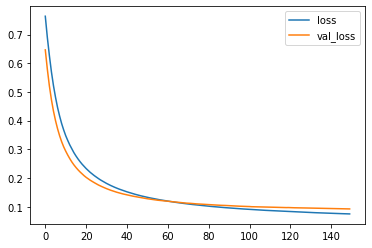

In [27]:
# Plot the cost function at each itteration
# Note: model.fit() returns an object that contains the history of the training process
plt.plot(result.history['loss'], label='loss');
plt.plot(result.history['val_loss'], label='val_loss');
plt.legend();

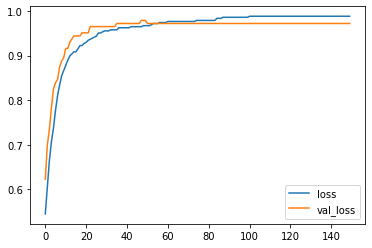

In [28]:
# Plot the cost function at each itteration
# Note: model.fit() returns an object that contains the history of the training process
plt.plot(result.history['accuracy'], label='loss');
plt.plot(result.history['val_accuracy'], label='val_loss');
plt.legend();